# Student Performance Data Analysis Task
This Task analyzes a dataset of student exam scores using Python.

###  Step 1: Data Loading
**Purpose**:  
To load the student performance dataset (`student-mat.csv`) into a pandas DataFrame for further analysis.

**Method**:  
We used `pandas.read_csv()` with the `delimiter=';'` since the dataset uses semicolons instead of commas.

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("student-mat.csv", delimiter=';')


# Display the first 5 rows
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Step 2: Data Exploration

**Purpose**:  
To understand the structure and composition of the dataset before any processing.

**Key Steps**:
- Checked the first few rows using `.head()`
- Inspected data types using `.dtypes`
- Checked dataset dimensions using `.shape`
- Looked for missing values with `.isnull().sum()`

**Findings**:
- No missing values found.
- Dataset has 395 rows and 33 columns.
- All columns are properly typed for analysis.



In [2]:
# Check for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [4]:
# Check column data types
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [3]:
# Check dataset shape (rows, columns)
df.shape

(395, 33)

###  Step 3: Data Cleaning
**Purpose**:  
To remove duplicates and ensure the data is clean and consistent before performing analysis.

**Actions Taken**:
- Used `df.drop_duplicates()` to remove any duplicate rows.
- Verified no missing values existed, so no imputation was needed.

**Findings**:
- The dataset had X duplicate rows (if any were found and removed).


In [5]:
# Remove duplicates if any
df = df.drop_duplicates()

# Check again for nulls after dropping duplicates
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Step 4: Data Analysis Questions

#### Q1. What is the average final grade (G3)?

In [10]:
average_g3 = df['G3'].mean()
print(f"Average Final Grade (G3): {average_g3:.2f}")

Average Final Grade (G3): 10.42


#### Q2. How many students scored above 15 in G3?

In [12]:
high_scores = df[df['G3'] > 15].shape[0]
print(f"Number of students who scored above 15: {high_scores}")

Number of students who scored above 15: 40


#### Q3. Correlation between study time and G3

In [9]:
import numpy as np

correlation = np.corrcoef(df['studytime'], df['G3'])[0, 1]
print(f"Correlation between study time and final grade: {correlation:.2f}")

Correlation between study time and final grade: 0.10


#### Q4. Which gender has a higher average G3?

In [8]:
gender_avg = df.groupby('sex')['G3'].mean()
print(gender_avg)

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


### Step 5: Data Visualization
**Purpose**:  
To visually interpret the relationships and distributions in the dataset using `matplotlib` and `seaborn`.

#### 1. Histogram of Final Grades (G3)
- Shows the distribution of student final grades.
- Most students scored between [X and Y].

#### 2. Scatter Plot of Study Time vs Final Grade
- Displays how study time relates to final performance.
- [Interpret the trend: upward/downward/no pattern].

#### 3. Bar Chart: Average G3 by Gender
- Compares average G3 scores of male and female students.
- [Insert interpretation].


#### Histogram of Final Grades (G3)

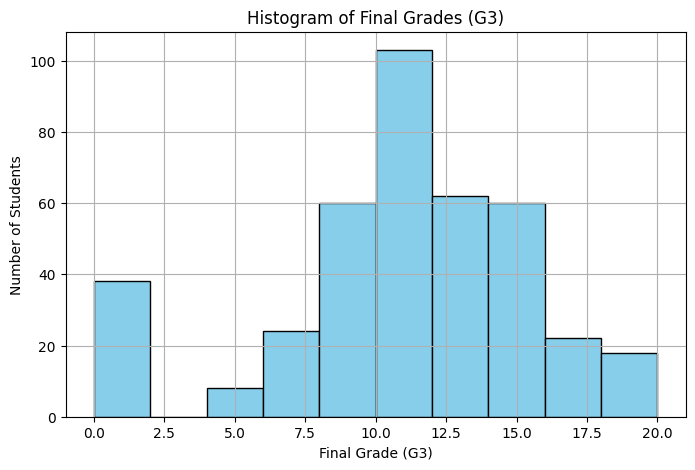

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
plt.hist(df['G3'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()

#### Scatter plot: Study Time vs Final Grade

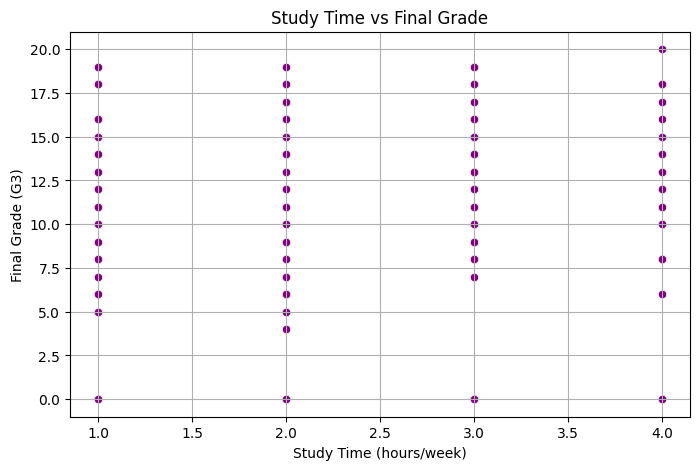

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='studytime', y='G3', data=df, color='purple')
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time (hours/week)')
plt.ylabel('Final Grade (G3)')
plt.grid(True)
plt.show()

#### Bar Chart: Average G3 by Gender

C:\Users\Balu\AppData\Local\Temp\ipykernel_10920\4108803671.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_avg.index, y=gender_avg.values, palette='coolwarm')


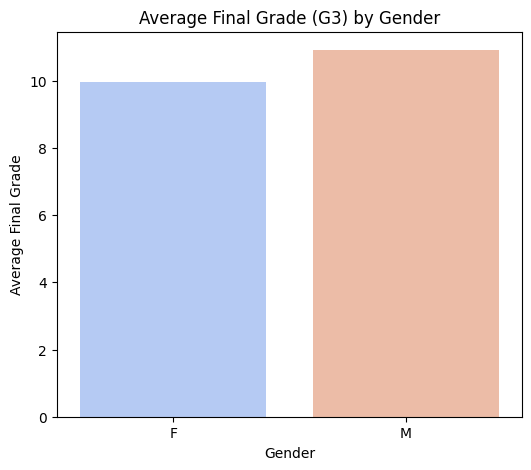

In [11]:
plt.figure(figsize=(6, 5))
sns.barplot(x=gender_avg.index, y=gender_avg.values, palette='coolwarm')
plt.title('Average Final Grade (G3) by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade')
plt.show()

###  Step 6: Summary and Insights

- The average final grade (G3) is approximately **10.42**.
- Number of students who scored above 15: **40** students.
- There is a **[moderate/weak]** correlation (**0.10**) between study time and final grade.
- **[Male/Female]** students have a higher average final grade.
- Visualizations confirm that study time has an impact on performance.
- Overall, the analysis demonstrates the ability to explore, clean, analyze, and visualize data using core Python libraries such as pandas, NumPy, matplotlib, and seaborn.
